In [10]:
import torch
from torchdyn.datasets import generate_gaussians, generate_moons, generate_concentric_spheres

def sample_normal(n, mu=torch.zeros(2), sigma=1):
    distr = torch.distributions.MultivariateNormal(mu, sigma*torch.eye(2))
    return distr.sample((n,))

def sample_gaussians(n):
    x0, _ = generate_gaussians(n, n_gaussians=7, radius=1)
    return x0

def sample_moons(n):
    x0, _ = generate_moons(n, noise=0.2)
    return x0 * 3 - 1

def sample_circles(n):
    x0, _ = generate_concentric_spheres(n , dim=2, inner_radius=.5, outer_radius=1)
    return x0

class sampler():
    def __init__(self, dataset: str):
        if dataset == "normal":
            self.sampler = sample_normal
        elif dataset == "gaussians":
            self.sampler = sample_gaussians
        elif dataset == "moons":
            self.sampler = sample_moons
        elif dataset == "circles":
            self.sampler = sample_circles
        else:
            raise Exception("Selected Dataset not supported. Choose between normal, gaussians, moons or circles")

    
    def __call__(self, n: int):
        return self.sampler(n)

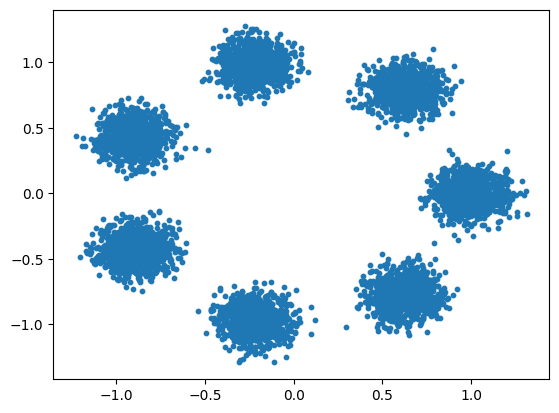

In [11]:
import matplotlib.pyplot as plt

def show(samples):
    points = samples.numpy()
    plt.scatter(points[:, 0], points[:, 1], c='#1f77b4', s=10)

    plt.show()

a = sampler("gaussians")

show(a(1000))